<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Constants" data-toc-modified-id="Constants-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Getting-the-Data" data-toc-modified-id="Getting-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Getting the Data</a></span></li><li><span><a href="#Question-1" data-toc-modified-id="Question-1-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 1</a></span><ul class="toc-item"><li><span><a href="#Part-A" data-toc-modified-id="Part-A-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Part A</a></span><ul class="toc-item"><li><span><a href="#CNN" data-toc-modified-id="CNN-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>CNN</a></span></li><li><span><a href="#Dense-Neural-Net" data-toc-modified-id="Dense-Neural-Net-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Dense Neural Net</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Discussion</a></span></li></ul></li><li><span><a href="#Part-B" data-toc-modified-id="Part-B-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Part B</a></span><ul class="toc-item"><li><span><a href="#Sigmoid-Activation" data-toc-modified-id="Sigmoid-Activation-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Sigmoid Activation</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Discussion</a></span></li></ul></li><li><span><a href="#Part-C" data-toc-modified-id="Part-C-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Part C</a></span><ul class="toc-item"><li><span><a href="#Discussion" data-toc-modified-id="Discussion-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Discussion</a></span></li></ul></li><li><span><a href="#Part-D" data-toc-modified-id="Part-D-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Part D</a></span><ul class="toc-item"><li><span><a href="#Adam-&amp;-Adagrad-Optimized-CNN" data-toc-modified-id="Adam-&amp;-Adagrad-Optimized-CNN-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Adam &amp; Adagrad Optimized CNN</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Discussion</a></span></li></ul></li><li><span><a href="#Part-E" data-toc-modified-id="Part-E-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Part E</a></span><ul class="toc-item"><li><span><a href="#5x5-Filters-CNN" data-toc-modified-id="5x5-Filters-CNN-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>5x5 Filters CNN</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Discussion</a></span></li></ul></li></ul></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Question 2</a></span><ul class="toc-item"><li><span><a href="#Part-A" data-toc-modified-id="Part-A-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Part A</a></span></li><li><span><a href="#Part-B" data-toc-modified-id="Part-B-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Part B</a></span></li></ul></li></ul></div>

# Imports 


In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, InputLayer
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


# Constants

In [0]:
BATCH_SIZE = 32
NUM_CLASSES = 10
EPOCHS = 20
DATA_AUGMENTATION = False
SAVE_DIR = os.path.join(os.getcwd(), 'saved_models')

# Getting the Data

In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

170500096/170498071 [==============================] - 9s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
minify = False
if minify:
  x_train = x_train[0:100]
  y_train = y_train[0:100]
  x_test = x_test[0:100]
  y_test = y_test[0:100]

# Question 1

## Part A

### CNN

In [0]:
def original_CNN(x_train, y_train, x_test, y_test, data_augmentation=DATA_AUGMENTATION, dropout=True):
  model_name = 'keras_cifar10_trained_model.h5'

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  if dropout:
    model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  if dropout:
    model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  if dropout:
    model.add(Dropout(0.5))
  model.add(Dense(NUM_CLASSES))
  model.add(Activation('softmax'))


  # initiate RMSprop optimizer
  opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  
  model.summary()

  if not data_augmentation:
      print('Not using data augmentation.')
      history = model.fit(x_train, y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                verbose=0,
                validation_data=(x_test, y_test),
                shuffle=True)
  else:
      print('Using real-time data augmentation.')
      # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          zca_epsilon=1e-06,  # epsilon for ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          # randomly shift images horizontally (fraction of total width)
          width_shift_range=0.1,
          # randomly shift images vertically (fraction of total height)
          height_shift_range=0.1,
          shear_range=0.,  # set range for random shear
          zoom_range=0.,  # set range for random zoom
          channel_shift_range=0.,  # set range for random channel shifts
          # set mode for filling points outside the input boundaries
          fill_mode='nearest',
          cval=0.,  # value used for fill_mode = "constant"
          horizontal_flip=True,  # randomly flip images
          vertical_flip=False,  # randomly flip images
          # set rescaling factor (applied before any other transformation)
          rescale=None,
          # set function that will be applied on each input
          preprocessing_function=None,
          # image data format, either "channels_first" or "channels_last"
          data_format=None,
          # fraction of images reserved for validation (strictly between 0 and 1)
          validation_split=0.0)

      # Compute quantities required for feature-wise normalization
      # (std, mean, and principal components if ZCA whitening is applied).
      datagen.fit(x_train)

      # Fit the model on the batches generated by datagen.flow().
      history = model.fit_generator(datagen.flow(x_train, y_train,
                                       batch_size=BATCH_SIZE),
                          steps_per_epoch=1563,
                          epochs=EPOCHS,
                          verbose=0,
                          validation_data=(x_test, y_test),
                          workers=4)

  # Save model and weights
  if not os.path.isdir(SAVE_DIR):
      os.makedirs(SAVE_DIR)
  model_path = os.path.join(SAVE_DIR, model_name)
  model.save(model_path)
  print('Saved trained model at %s ' % model_path)

  # Score trained model.
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  
  train_acc = history.history['acc']
  test_acc = history.history['val_acc']

  return [train_acc, test_acc]

### Dense Neural Net

In [0]:
def dense_network(x_train, y_train, x_test, y_test, num_hidden=0, data_augmentation=DATA_AUGMENTATION):
  model_name = 'keras_dense_trained_model.h5'

  model = Sequential()
  model.add(InputLayer(x_train.shape[1:], name="input"))
  model.add(Flatten())
  for i in range(num_hidden):
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))

  model.add(Dense(NUM_CLASSES, activation='softmax', name="output"))

  # initiate RMSprop optimizer
  opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255

  if not data_augmentation:
      print('Not using data augmentation.')
      history = model.fit(x_train, y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                verbose=0,
                validation_data=(x_test, y_test),
                shuffle=True)
  else:
      print('Using real-time data augmentation.')
      # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          zca_epsilon=1e-06,  # epsilon for ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          # randomly shift images horizontally (fraction of total width)
          width_shift_range=0.1,
          # randomly shift images vertically (fraction of total height)
          height_shift_range=0.1,
          shear_range=0.,  # set range for random shear
          zoom_range=0.,  # set range for random zoom
          channel_shift_range=0.,  # set range for random channel shifts
          # set mode for filling points outside the input boundaries
          fill_mode='nearest',
          cval=0.,  # value used for fill_mode = "constant"
          horizontal_flip=True,  # randomly flip images
          vertical_flip=False,  # randomly flip images
          # set rescaling factor (applied before any other transformation)
          rescale=None,
          # set function that will be applied on each input
          preprocessing_function=None,
          # image data format, either "channels_first" or "channels_last"
          data_format=None,
          # fraction of images reserved for validation (strictly between 0 and 1)
          validation_split=0.0)

      # Compute quantities required for feature-wise normalization
      # (std, mean, and principal components if ZCA whitening is applied).
      datagen.fit(x_train)

      # Fit the model on the batches generated by datagen.flow().
      history = model.fit_generator(datagen.flow(x_train, y_train,
                                       batch_size=BATCH_SIZE),
                          steps_per_epoch=1563,
                          epochs=EPOCHS,
                          verbose=0,
                          validation_data=(x_test, y_test),
                          workers=4)

  # Save model and weights
  if not os.path.isdir(SAVE_DIR):
      os.makedirs(SAVE_DIR)
  model_path = os.path.join(SAVE_DIR, model_name)
  model.save(model_path)
  print('Saved trained model at %s ' % model_path)

  # Score trained model.
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  
  train_acc = history.history['acc']
  test_acc = history.history['val_acc']
  
  return [train_acc, test_acc]

In [0]:
[cnn_train_acc, cnn_test_acc] = original_CNN(x_train, y_train, x_test, y_test)
[dense0_train_acc, dense0_test_acc] = dense_network(x_train, y_train, x_test, y_test, 0)
[dense1_train_acc, dense1_test_acc] = dense_network(x_train, y_train, x_test, y_test, 1)
[dense2_train_acc, dense2_test_acc] = dense_network(x_train, y_train, x_test, y_test, 2)
[dense3_train_acc, dense3_test_acc] = dense_network(x_train, y_train, x_test, y_test, 3)
[dense4_train_acc, dense4_test_acc] = dense_network(x_train, y_train, x_test, y_test, 4)

W0711 23:10:21.507110 140470915528576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 23:10:21.523031 140470915528576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 23:10:21.526477 140470915528576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 23:10:21.558077 140470915528576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0711 23:10:21.561389 140470915528576 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

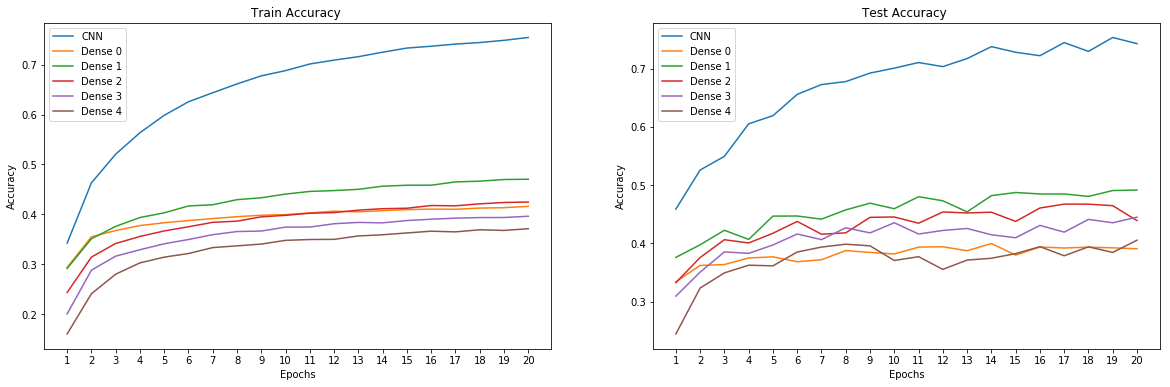

In [0]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
plt.plot(list(range(1, EPOCHS+1)) , cnn_train_acc )
plt.plot(list(range(1, EPOCHS+1)) , dense0_train_acc )
plt.plot(list(range(1, EPOCHS+1)) , dense1_train_acc )
plt.plot(list(range(1, EPOCHS+1)) , dense2_train_acc)
plt.plot(list(range(1, EPOCHS+1)) , dense3_train_acc )
plt.plot(list(range(1, EPOCHS+1)) , dense4_train_acc )


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(1, EPOCHS+1)))
plt.title('Train Accuracy ')

plt.legend(['CNN', 'Dense 0', 'Dense 1', 'Dense 2', 'Dense 3', 'Dense 4'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(list(range(1, EPOCHS+1)) , cnn_test_acc )
plt.plot(list(range(1, EPOCHS+1)) , dense0_test_acc )
plt.plot(list(range(1, EPOCHS+1)) , dense1_test_acc )
plt.plot(list(range(1, EPOCHS+1)) , dense2_test_acc)
plt.plot(list(range(1, EPOCHS+1)) , dense3_test_acc )
plt.plot(list(range(1, EPOCHS+1)) , dense4_test_acc )


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(1, EPOCHS+1)))
plt.title('Test Accuracy ')

plt.legend(['CNN', 'Dense 0', 'Dense 1', 'Dense 2', 'Dense 3', 'Dense 4'], loc='upper left')


plt.show()

### Discussion

The convolutional neural net outperforms all the densely connected neural networks on the training and test set. Both types of neural networks learn a representation of the data that best allows them to predict a probability of a class. 

The densely connected networks perform poorly because their design fails to capture the following two important biases: 

1) Spatial correlation

2) Translational invariance

In a dense network, all the pixels & channels are treated as independent inputs. The input matrix is unrolled into a singular vector for processing through the multilayer perceptron. We do not provide any bias to the network in any way to treat pixels that are closer to each other as having an inherent relation in forming our understanding of an object. This bias is something that our multilayer perceptron would inherently have to learn. Thus, the hypothesis space for the densely connected network is much broader than it should be.

The second property we would like to have in an object recognition model is that it should be able to correctly classify an object and any translation of that object across the image. In a densely connected network, if an object moves across the image, it is likely to affect different input neurons and new weights will have to be assigned to recognize the object.

Let's discuss how the convolutional neural network overcomes these challenges.

To give pixel position and neighbourhood semantic meaning, the convolution neural net uses a small kernel patch trained across many strides of the image. Learning the weights for this kernel across these strides inherently biases our network to learn small features of the image that are closely defined. This introduces spatial correlation bias to the network. Furthermore,  these features are aggregated in a hierarchal way through the depth of the network to form more complex features that form the object we are trying to identify. The convolution kernel for a specific filter learns a certain aspect of the image data (like vertical lines, etc.) and fires whenever that feature is detected. 

The convolution kernel achieves translational invariance through parameter sharing. In each convolution layer, the kernel is applied across many strides across the image. In this essence, the feature that is learned by the kernel must be translation invariant as it trained across many translations across the image with the same shared weights.

Now, let's discuss the performance for each type of dense network above.

For a network with no hidden layers, we expect the network to perform well if the data is linearly seperable. For object recognition, it is clear to see why this is not the case. The pixel color from each position is not linearly correlated to any object, so the data will not be linearly seperable. This network will tend to learn the average pixel color for an object in a position & attempt to discriminate based on these values. This is why the network with 0 hidden layers does not perform well.

For a network with 1 hidden layer, the network will learn a complex non-linear decision boundary. The hidden layer learns a new representation of the data that combines the pixel data in linear ways, followed by a non-linear activation. In our case, we see that this network has better performance than the network with no hidden layers. It is possible the neural net learns some attributes that correlate nearby pixels together or could learn what happens on average to different pixel positions when certain objects are present. These learnings are largely tough to generalize and are vulnerable to intricacies of the training data. The hypothesis space for the network with 1 hidden layer is much larger and can encompass non-linearities we expect in pixel data. For this reason, the network with 1 layer can outperform the network with no hidden layers.

For a network with more than 1 hidden layer, we learn hierarchies of non-linear representations with no bias towards spatial correlation or translation invariance. These hierarchies will learn features that have little to no semantic meaning as they will tend to correlate various pixel positions and their interactions with other various pixel positions to an object. This is why as we increase the layers, we see the neural network perform more poorly as it finds itself in a continually more complex hypothesis space with no bias towards meaningful features. Additionally, a network with more hidden layers introduces many more parameters. This bolsters the risk of overfitting. 


## Part B

### Sigmoid Activation

In [0]:
def sigmoid_CNN(x_train, y_train, x_test, y_test, data_augmentation=DATA_AUGMENTATION):
  model_name = 'keras_cifar10_trained_model.h5'

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('sigmoid'))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation('sigmoid'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('sigmoid'))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('sigmoid'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('sigmoid'))
  model.add(Dropout(0.5))
  model.add(Dense(NUM_CLASSES))
  model.add(Activation('softmax'))


  # initiate RMSprop optimizer
  opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  
  model.summary()

  if not data_augmentation:
      print('Not using data augmentation.')
      history = model.fit(x_train, y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                verbose=0,
                validation_data=(x_test, y_test),
                shuffle=True)
  else:
      print('Using real-time data augmentation.')
      # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          zca_epsilon=1e-06,  # epsilon for ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          # randomly shift images horizontally (fraction of total width)
          width_shift_range=0.1,
          # randomly shift images vertically (fraction of total height)
          height_shift_range=0.1,
          shear_range=0.,  # set range for random shear
          zoom_range=0.,  # set range for random zoom
          channel_shift_range=0.,  # set range for random channel shifts
          # set mode for filling points outside the input boundaries
          fill_mode='nearest',
          cval=0.,  # value used for fill_mode = "constant"
          horizontal_flip=True,  # randomly flip images
          vertical_flip=False,  # randomly flip images
          # set rescaling factor (applied before any other transformation)
          rescale=None,
          # set function that will be applied on each input
          preprocessing_function=None,
          # image data format, either "channels_first" or "channels_last"
          data_format=None,
          # fraction of images reserved for validation (strictly between 0 and 1)
          validation_split=0.0)

      # Compute quantities required for feature-wise normalization
      # (std, mean, and principal components if ZCA whitening is applied).
      datagen.fit(x_train)

      # Fit the model on the batches generated by datagen.flow().
      history = model.fit_generator(datagen.flow(x_train, y_train,
                                       batch_size=BATCH_SIZE),
                          steps_per_epoch=1563,
                          epochs=EPOCHS,
                          verbose=0,
                          validation_data=(x_test, y_test),
                          workers=4)

  # Save model and weights
  if not os.path.isdir(SAVE_DIR):
      os.makedirs(SAVE_DIR)
  model_path = os.path.join(SAVE_DIR, model_name)
  model.save(model_path)
  print('Saved trained model at %s ' % model_path)

  # Score trained model.
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  
  train_acc = history.history['acc']
  test_acc = history.history['val_acc']

  return [train_acc, test_acc]

In [0]:
[sigmoid_train_acc, sigmoid_test_acc] = sigmoid_CNN(x_train, y_train, x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
__________

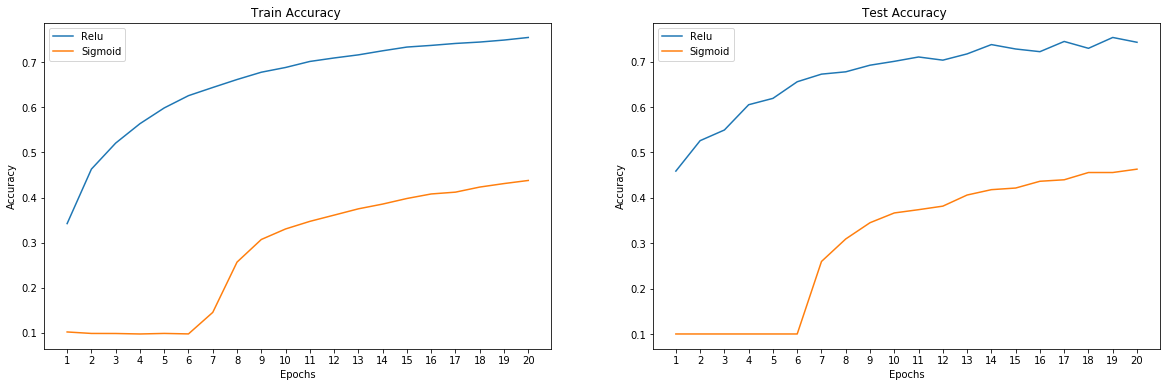

In [0]:

plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
plt.plot(list(range(1, EPOCHS+1)) , cnn_train_acc )
plt.plot(list(range(1, EPOCHS+1)) , sigmoid_train_acc )


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(1, EPOCHS+1)))
plt.title('Train Accuracy ')

plt.legend(['Relu', 'Sigmoid'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(list(range(1, EPOCHS+1)) , cnn_test_acc )
plt.plot(list(range(1, EPOCHS+1)) , sigmoid_test_acc )


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(1, EPOCHS+1)))
plt.title('Test Accuracy ')

plt.legend(['Relu', 'Sigmoid'], loc='upper left')

plt.show()

### Discussion

The neural network using RELU activation achieves a higher accuracy in less epochs & continually beats out the sigmoid activation function for this dataset.

The abysmal performance of the sigmoid activation in early epochs can be attributed to vanishing gradients. The sigmoid function has a derivative of up to 1 and for the majority of values, the derivative is closer to 0 at the tail ends of the function as x approaches infinity or negative infinity. For this reason, the error that is backpropagated through the network may be very small and doesn't change the weights very much in the first bunch of epochs. It tells us that the weights our network was initialized to caused large values of outputs to be forward propagated in the first bunch of epochs, leading to small error gradient on back propagation. Our sigmoid activation gets caught where the gradient plateaus. 

In comparison, the RELU activation has a gradient of either 0 or 1. If the RELU is active, we have a gradient of 1. This is really beneficial in ensuring there are no vanishing gradients and the gradient step can move actionably in some direction. For this reason, it attains convergence much faster & outperforms the sigmoid on all 20 epochs. Perhaps if we were to continue training, the sigmoid function could eventually converge to the RELU solution. However, it is clear this convergence rate is much slower than we desire.



## Part C

In [11]:
# Setup larger EPOCHS
EPOCHS = 100
[rmsprop_train_acc, rmsprop_test_acc] = original_CNN(x_train, y_train, x_test, y_test) # variable is named like this for next question
[nodropout_noaug_train_acc, nodropout_noaug_test_acc] = original_CNN(x_train, y_train, x_test, y_test, data_augmentation=False, dropout=False)
[dropout_aug_train_acc, dropout_aug_test_acc] = original_CNN(x_train, y_train, x_test, y_test, data_augmentation=True, dropout=True)
[nodropout_aug_train_acc,nodropout_aug_test_acc ] = original_CNN(x_train, y_train, x_test, y_test, data_augmentation=True, dropout=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
__________

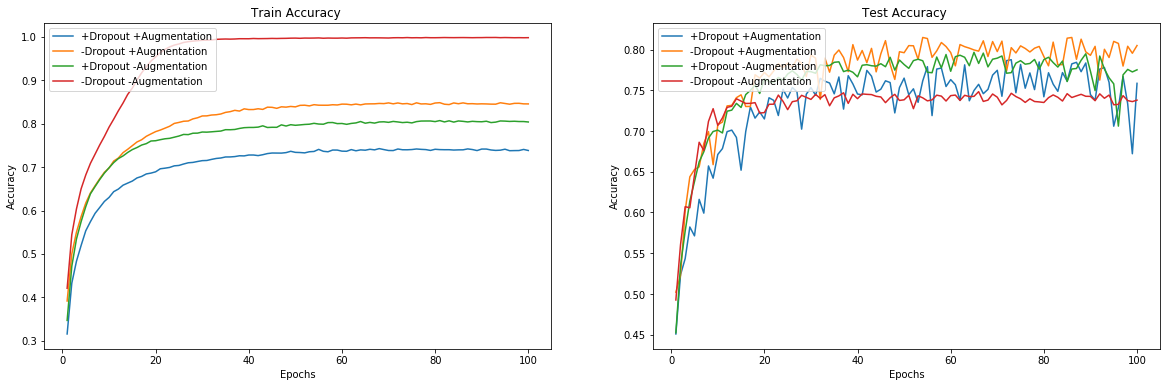

In [14]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
plt.plot(list(range(1, EPOCHS+1)) , dropout_aug_train_acc )
plt.plot(list(range(1, EPOCHS+1)) , nodropout_aug_train_acc )
plt.plot(list(range(1, EPOCHS+1)) , rmsprop_train_acc )
plt.plot(list(range(1, EPOCHS+1)) , nodropout_noaug_train_acc )


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy ')

plt.legend(['+Dropout +Augmentation', '-Dropout +Augmentation', '+Dropout -Augmentation', '-Dropout -Augmentation'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(list(range(1, EPOCHS+1)) , dropout_aug_test_acc )
plt.plot(list(range(1, EPOCHS+1)) , nodropout_aug_test_acc )
plt.plot(list(range(1, EPOCHS+1)) , rmsprop_test_acc)
plt.plot(list(range(1, EPOCHS+1)) , nodropout_noaug_test_acc )

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy ')

plt.legend(['+Dropout +Augmentation', '-Dropout +Augmentation', '+Dropout -Augmentation', '-Dropout -Augmentation'], loc='upper left')

plt.show()

### Discussion

The network with no dropout & no augmentation gains the highest training accuracy, and lowest test accuracy. It is clearly overfit on the intricacies of the training dataset. This is why it performs poorly on the test set. We require some sort of regularization to correct this.

The network with no dropout but with data augmentation performs just below the network without dropout and without augmentation on the training set. This shows that adding data augmentation makes it more difficult to increase accuracy on the training set. This is because the training set is augmented in each epoch so that not all the training inputs are the same each time. This forces our network to learn more general features that are invariant to the augmentations we provided to the data. This type of regularization helps boost the test accuracy. This network with no dropout and with augmentation provides the highest accuracy on the test set. We see that this type of regularization happened to be most effective for our dataset.

The network with dropout but without data augumentation performs below the network without dropout but with data augmentation. This shows that adding dropout tends to punish the accuracy more so than adding augmentation for the training set. It is a stricter form of regularization that builds an approximation of ensemble learning where each subnetwork acts as a weak learner. For our dataset, this does not work as well as adding data augmentation. In our test accuracy graph, we see that the network with dropout but without data augumentation, performs below the network without dropout but with data augmentation; reflecting the results from the training accuracy. Dropout punishes the accuracy on both training and test more so than data augmentation.

The network with both dropout and data augmentation performs the worst on training and performs almost as poorly as the network without either forms of overfitting protection. Dropout and data augmentation combined punish overfitting too drastically and the network is unable to generalize as well to the test set. Since the expressivity of all our models is the same, (given that each has the same # of parameters), the training & test data shows that dropout & data augmentation combined over-regularize our network.

## Part D

### Adam & Adagrad Optimized CNN

In [0]:
def custom_opt_CNN(x_train, y_train, x_test, y_test, opt, data_augmentation=DATA_AUGMENTATION, dropout=True):
  model_name = 'keras_cifar10_trained_model.h5'

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  if dropout:
    model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  if dropout:
    model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  if dropout:
    model.add(Dropout(0.5))
  model.add(Dense(NUM_CLASSES))
  model.add(Activation('softmax'))

  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  
  model.summary()

  if not data_augmentation:
      print('Not using data augmentation.')
      history = model.fit(x_train, y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                verbose=0,
                validation_data=(x_test, y_test),
                shuffle=True)
  else:
      print('Using real-time data augmentation.')
      # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          zca_epsilon=1e-06,  # epsilon for ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          # randomly shift images horizontally (fraction of total width)
          width_shift_range=0.1,
          # randomly shift images vertically (fraction of total height)
          height_shift_range=0.1,
          shear_range=0.,  # set range for random shear
          zoom_range=0.,  # set range for random zoom
          channel_shift_range=0.,  # set range for random channel shifts
          # set mode for filling points outside the input boundaries
          fill_mode='nearest',
          cval=0.,  # value used for fill_mode = "constant"
          horizontal_flip=True,  # randomly flip images
          vertical_flip=False,  # randomly flip images
          # set rescaling factor (applied before any other transformation)
          rescale=None,
          # set function that will be applied on each input
          preprocessing_function=None,
          # image data format, either "channels_first" or "channels_last"
          data_format=None,
          # fraction of images reserved for validation (strictly between 0 and 1)
          validation_split=0.0)

      # Compute quantities required for feature-wise normalization
      # (std, mean, and principal components if ZCA whitening is applied).
      datagen.fit(x_train)

      # Fit the model on the batches generated by datagen.flow().
      history = model.fit_generator(datagen.flow(x_train, y_train,
                                       batch_size=BATCH_SIZE),
                          steps_per_epoch=1563,
                          epochs=EPOCHS,
                          verbose=0,
                          validation_data=(x_test, y_test),
                          workers=4)

  # Save model and weights
  if not os.path.isdir(SAVE_DIR):
      os.makedirs(SAVE_DIR)
  model_path = os.path.join(SAVE_DIR, model_name)
  model.save(model_path)
  print('Saved trained model at %s ' % model_path)

  # Score trained model.
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  
  train_acc = history.history['acc']
  test_acc = history.history['val_acc']

  return [train_acc, test_acc]

def adam_CNN(x_train, y_train, x_test, y_test):
  opt = keras.optimizers.Adam()
  return custom_opt_CNN(x_train, y_train, x_test, y_test, opt)

def adagrad_CNN(x_train, y_train, x_test, y_test):
  opt = keras.optimizers.Adagrad()
  return custom_opt_CNN(x_train, y_train, x_test, y_test, opt)

In [0]:
[adam_train_acc, adam_test_acc] = adam_CNN(x_train, y_train, x_test, y_test)
[adagrad_train_acc, adagrad_test_acc] = adagrad_CNN(x_train, y_train, x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        18496     
__________

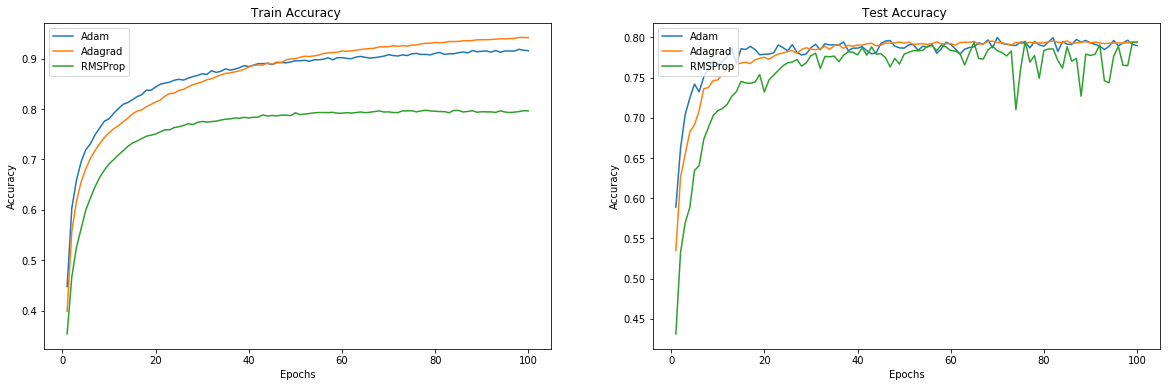

In [0]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
plt.plot(list(range(1, EPOCHS+1)) , adam_train_acc )
plt.plot(list(range(1, EPOCHS+1)) , adagrad_train_acc )
plt.plot(list(range(1, EPOCHS+1)) , rmsprop_train_acc )


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy ')

plt.legend(['Adam', 'Adagrad', 'RMSProp'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(list(range(1, EPOCHS+1)) , adam_test_acc )
plt.plot(list(range(1, EPOCHS+1)) , adagrad_test_acc )
plt.plot(list(range(1, EPOCHS+1)) , rmsprop_test_acc )

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy ')

plt.legend(['Adam', 'Adagrad', 'RMSProp'], loc='upper left')

plt.show()

### Discussion

RMSprop performs the most poorly of all three optimizers on the training set and the test set. 

On the training set, it reaches convergence much before Adam. It achieves a stable accuracy at around 25 epochs. This shows that RMSprop converges on some local minimum in an early epoch. RMSprop is able to adjust the learning rate of each dimension based on the moving average of the gradient. For gradients that are continually small, we want to update by a larger step in order to get out of plateaus. For gradients that are continually steep, we want to update by smaller steps in order to not overshoot. 

But what happens if we encounter a large steep region that is steep for a long time? Then RMSprop is unable to adjust since it will prefer small steps for a long time. This means RMSprop lacks because it does not use any concept of gradient momentum.

For this reason, RMSprop could be stuck in a large steep region and is unable to climb out of local optimums. This is why it attains convergence faster, and performs poorly in comparison to Adagrad and Adam. 

Adagrad is similar to RMSprop except it doesn't use a moving average to adjust the learning rate per dimension, instead it uses a continual sum. For this reason, Adagrad is susceptible to the learning rate decaying too quickly. In comparison to Adam, Adam uses momentum by taking the gradient to be a moving average of the previous gradients. This can allow it to quickly move across long valleys and reach convergence faster than Adagrad. Adam converges faster than Adagrad initially in early epochs for this reason.

Since Adagrad goes on to outperform Adam and RMSprop in later epochs, it is likely that a smaller learning rate is more beneficial in later epochs. This could be because our gradient is very bumpy and larger learning rates can overshoot on a hill or valley. Especially with Adam, where we use the concept of momentum, Adam is susceptible to potentially overshooting on gradient surfaces with large hills/valleys and pointy tops or bottoms. For this reason, Adagrad outperforms both RMSprop and Adam on training accuracy in later epochs.

When looking at our test accuracies, we see that Adam and Adagrad perform very similarly. Adagrad is very stable across epochs with little variance in accuracy. This shows that the small step sizes Adagrad takes in later epochs is beneficial to maintaining the same accuracy. RMSprop varies the most out of all the optimizers because it doesn't use momentum and continues to have various step sizes that may or may not overshoot/undershoot. It tends to get stuck in different local optima in each epoch which give different results on the test accuracy.

## Part E 

### 5x5 Filters CNN

In [0]:
def fivebyfive_CNN(x_train, y_train, x_test, y_test, data_augmentation=DATA_AUGMENTATION, dropout=True):
  model_name = 'keras_cifar10_trained_model.h5'

  model = Sequential()
  model.add(Conv2D(32, (5, 5), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  if dropout:
    model.add(Dropout(0.25))

  model.add(Conv2D(64, (5, 5), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  if dropout:
    model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  if dropout:
    model.add(Dropout(0.5))
  model.add(Dense(NUM_CLASSES))
  model.add(Activation('softmax'))

  # initiate RMSprop optimizer
  opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  
  model.summary()

  if not data_augmentation:
      print('Not using data augmentation.')
      history = model.fit(x_train, y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                verbose=0,
                validation_data=(x_test, y_test),
                shuffle=True)
  else:
      print('Using real-time data augmentation.')
      # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          zca_epsilon=1e-06,  # epsilon for ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          # randomly shift images horizontally (fraction of total width)
          width_shift_range=0.1,
          # randomly shift images vertically (fraction of total height)
          height_shift_range=0.1,
          shear_range=0.,  # set range for random shear
          zoom_range=0.,  # set range for random zoom
          channel_shift_range=0.,  # set range for random channel shifts
          # set mode for filling points outside the input boundaries
          fill_mode='nearest',
          cval=0.,  # value used for fill_mode = "constant"
          horizontal_flip=True,  # randomly flip images
          vertical_flip=False,  # randomly flip images
          # set rescaling factor (applied before any other transformation)
          rescale=None,
          # set function that will be applied on each input
          preprocessing_function=None,
          # image data format, either "channels_first" or "channels_last"
          data_format=None,
          # fraction of images reserved for validation (strictly between 0 and 1)
          validation_split=0.0)

      # Compute quantities required for feature-wise normalization
      # (std, mean, and principal components if ZCA whitening is applied).
      datagen.fit(x_train)

      # Fit the model on the batches generated by datagen.flow().
      history = model.fit_generator(datagen.flow(x_train, y_train,
                                       batch_size=BATCH_SIZE),
                          steps_per_epoch=1563,
                          epochs=EPOCHS,
                          verbose=0,
                          validation_data=(x_test, y_test),
                          workers=4)

  # Save model and weights
  if not os.path.isdir(SAVE_DIR):
      os.makedirs(SAVE_DIR)
  model_path = os.path.join(SAVE_DIR, model_name)
  model.save(model_path)
  print('Saved trained model at %s ' % model_path)

  # Score trained model.
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  
  train_acc = history.history['acc']
  test_acc = history.history['val_acc']

  return [train_acc, test_acc]

In [0]:
[fivebyfive_train_acc, fivebyfive_test_acc] = fivebyfive_CNN(x_train, y_train, x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_49 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
activation_50 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 64)          0         
__________

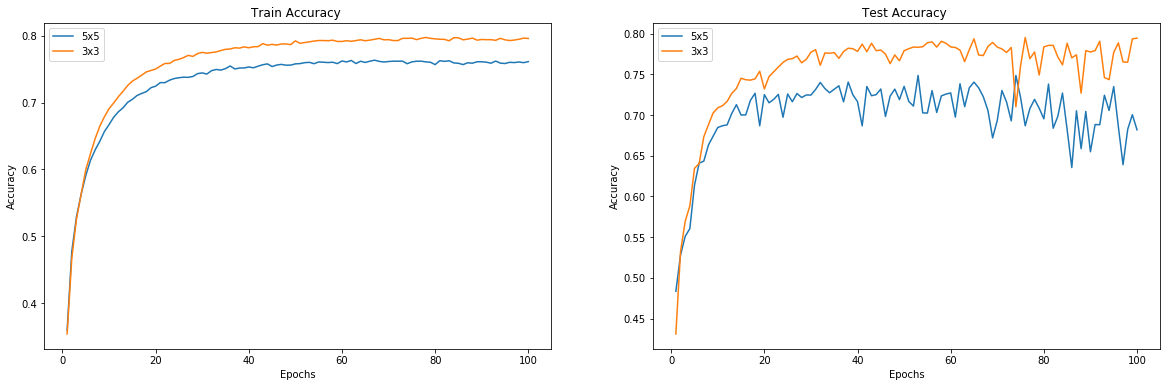

In [0]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
plt.plot(list(range(1, EPOCHS+1)) , fivebyfive_train_acc )
plt.plot(list(range(1, EPOCHS+1)) , rmsprop_train_acc )


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy ')

plt.legend(['5x5', '3x3'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(list(range(1, EPOCHS+1)) , fivebyfive_test_acc )
plt.plot(list(range(1, EPOCHS+1)) , rmsprop_test_acc )

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy ')

plt.legend(['5x5', '3x3'], loc='upper left')

plt.show()

### Discussion

The smaller filter size of 3x3 outperforms the larger filter size of 5x5 filters on both the test and train accuracy.

They both converge at around the same number of epochs.

The better performance of the 3x3 filters can be attributed to learning more fine-grained features of the image data. These smaller filter sizes allow us to learn a more general feature set that is learned over many smaller 3x3 partitions of the image. The 5x5 filters will learn larger features that are valid over larger parts of the image. Unfortunately, for this dataset, the more fine-grained features produced by the 3x3 filters are more useful than those produced by the 5x5 filters.

In the next convolution layer, the 5x5 filters continue to produce larger hierarchal features that encompass many smaller 5x5 convolutions applied on the original input. These features are too general for our dataset and again, the more fine-grained features learned by the 3x3 filter works better in this case.

Furthermore, the network is deeper and the matrix is reduced by less dimensions in each layer for the 3x3 filter size. This allows the deeper neural network to compose more complex features formed through each layer. 

# Question 2

## Part A

Consider that we have a network with one hidden convolution layer of 5x5 patches and strides of 1 with a softmax output layer. Let the input images be one-channel images with pixels that are either fully black or fully white. Let the black pixel be 1 and white pixel be 0.

Consider that we only look at the class of objects of a single black pixel surrounded by white. Thus, the softmax layer essentially acts as a sigmoid and gives us the probability of this one class being in the image.

Let this network have weights for the convolution filter filled with all -1's except for a +1 in the dead center.

This filter outputs 1 only when applied to a patch with all white pixels except 1 black pixel in the middle. Let the softmax layer have all zero weights except for a single weight $w_i$ which is equal to 1. 

This weight, $w_i$, corresponds to a single 5x5 patch, $P_i$, where the filter is applied. Whenever the filter "fires", it means it's detected a single black pixel in the center. Since we assign all the weight to this one convolution patch, the entire network fires/detects the desired object when the filter applied to this patch $P_i$ fires. This is because when the value of 1 from the filter is forward propagated to the softmax layer, it outputs a probability greater than 0.5 since $\sigma(1) > 0.5$

Consider that we have an image with one black pixel in the center location of the patch $P_i$. Then from our logic above, this network will correctly classify this image. 

However, if we move this image by 1 pixel to the right, the filter applied to $P_i$ will produce a value of -1. This will forward propagate to the softmax layer where a probability of less than 0.5 is outputted and the desired object will not be detected. Thus, this network described is clearly not translation invariant.

## Part B

Consider that we have a network with one hidden convolution layer of 5x5 patches and strides of 1, followed by a max-pooling layer with 4x4 patches and a stride of 4, followed by a softmax output layer. Let the input images be one-channel images with pixels that are either fully black or fully white. Let the black pixel be 1 and white pixel be 0.

Consider that we only look at the class of objects of a single black pixel surrounded by white. Thus, the softmax layer essentially acts as a sigmoid and gives us the probability of this one class being in the image.

Let this network have weights for the convolution filter filled with all -1's except for a +1 in the dead center.

This filter outputs 1 only when applied to a patch with all white pixels except 1 black pixel in the middle. Whenever the filter "fires", it means it's detected a single black pixel in the center. Let the softmax layer have all zero weights except for a single weight $w_i$ which is equal to 1. 

Let this weight, $w_i$, corresponds to a single 4x4 patch of the convolution layer, $H_i$, where the max-pooling operation is applied to. Since we assign all the weight to this one max-pooling patch, the entire network fires/detects the desired object when a convolution filter in this 4x4 patch fires. Let the very top right pixel of this 4x4 patch, $H_i$, correspond to a 5x5 convolution patch, $P_i$.

Consider that we have an image with one black pixel in the center location of the patch $P_i$. Then from our logic above, this network will correctly classify this image. 

However, if we move this object by 1 pixel to the right, none of the filters in the 4x4 patch, $H_i$, will fire. This will forward propagate through the max-pooling layer to the softmax layer where a probability of less than 0.5 is outputted, and the desired object will not be detected. Thus, this network described is clearly not translation invariant.